# Section 1

# Decision Tree

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Read "bank-full.csv"

In [4]:
bf = pd.read_csv('bank-full.csv' , delimiter = ';')

In [10]:
bf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Check the distribution of labels (‘yes’, ‘no’) are distributed.


In [7]:
bf['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

## Counts of "yes" and "no" with "age"

In [14]:
bf.groupby(['age'])['y'].value_counts()

age  y  
18   yes     7
     no      5
19   no     24
     yes    11
20   no     35
            ..
92   yes     2
93   yes     2
94   no      1
95   no      1
     yes     1
Name: y, Length: 148, dtype: int64

## Correlation between the data

In [9]:
bf.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


Plot the heatmap

<AxesSubplot:>

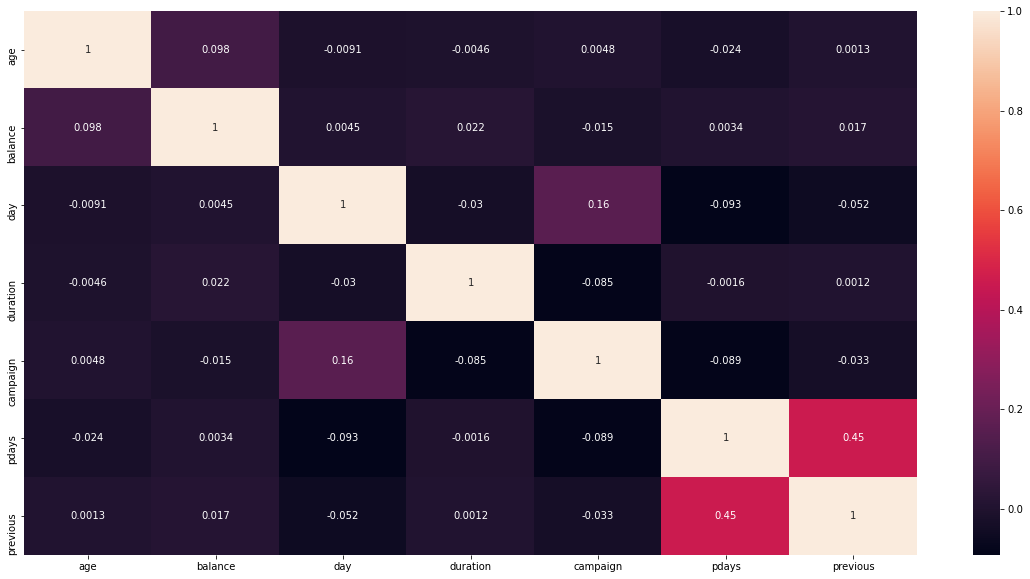

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(data=bf.corr(), annot=True)

## Convert categorical data into numerical

In [9]:
bf.default.replace(('yes','no'), (1,0), inplace = True)
bf.housing.replace(('yes','no'), (1,0), inplace = True)
bf.loan.replace(('yes','no'), (1,0), inplace = True)
bf.y.replace(('yes','no'), (1,0), inplace = True)

bf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


Next step is to select features and labels

In [13]:
feature_cols = ['default','housing','loan']

x = bf[feature_cols]
y = bf.y

Drop "poutcome"

In [14]:
bf = bf.drop(columns = 'poutcome' , axis = 1)
bf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,0


## Split the data into train and test

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Applying Decision Tree Classifier:

Next, I created a pipeline of StandardScaler (standardize the features) and DT Classifier (see a note below regarding Standardization of features). We can import DT classifier as from sklearn.tree import DecisionTreeClassifier from Scikit-Learn. To determine the best parameters (criterion of split and maximum tree depth) for DT classifier, I also used Grid Search Cross Validation. The code snippet below is self-explanatory.

In [16]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

## To display

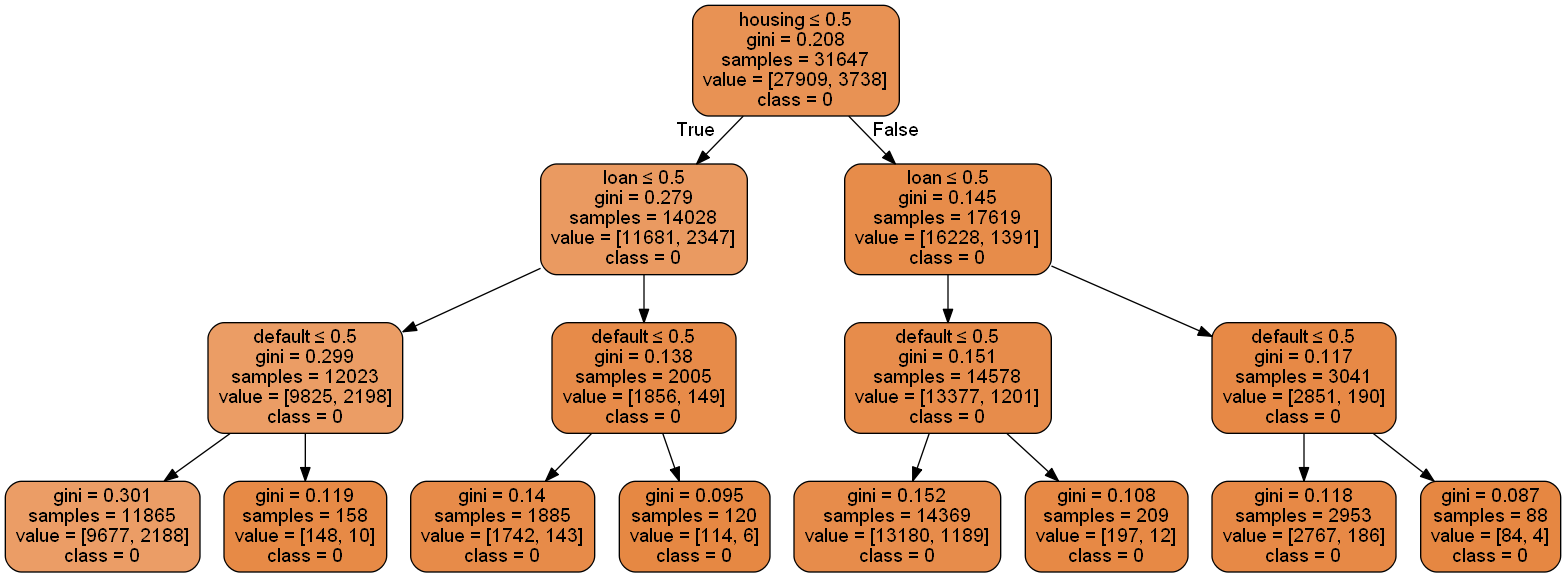

In [22]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file = dot_data , filled = True , rounded = True , special_characters = True, 
                feature_names = feature_cols , class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

The number of nodes and the maximum depth

In [25]:
print (classifier.tree_.node_count , classifier.tree_.max_depth)

15 3


## Accuracy measurement

In [27]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8856531996461221

# Prediction

In [28]:
pd.DataFrame({'prediction': y_pred})

,prediction
0,0
1,0
2,0
3,0
4,0
...,...
13559,0
13560,0
13561,0
13562,0


# Grid Search

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [('dec_tree', classifier)])
criterion = ['gini','entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(dec_tree__criterion = criterion , dec_tree__max_depth = max_depth)
grid_search = GridSearchCV(pipe, parameters)

grid_search.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12]})

## Display the best features

In [44]:
print ('Best Criterion:', grid_search.best_estimator_.get_params()['dec_tree__criterion'])
print ('Best Maximun depth:', grid_search.best_estimator_.get_params()['dec_tree__max_depth'])
print();
print(grid_search.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best Maximun depth: 2

DecisionTreeClassifier(max_depth=2)



## Run DecisionTreeClassifier using the obtained features

In [45]:
optimized_classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
optimized_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

## Concat train test results

In [47]:
y_pred_train = optimized_classifier.predict(x_train)
y_pred_test = optimized_classifier.predict(x_test)
y_pred_train = y_pred_train.reshape(len(y_pred_train), 1)
y_pred_test = y_pred_test.reshape(len(y_pred_test), 1)

print ('Train Result')
print (np.concatenate((y_pred_train, y_train.to_numpy().reshape(len(y_train), 1)), 1))
print('\n')
print ('Test Result')
print (np.concatenate((y_pred_test, y_test.to_numpy().reshape(len(y_test), 1)), 1))

Train Result
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Test Result
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


# Section 2
1. Read "petrol_consumption.csv" file

In [17]:
pc = pd.read_csv('petrol_consumption.csv')
pc

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


2. Display the first 5 records

In [18]:
pc.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


4. Identify the label (Petrol_Consumption)


In [19]:
y = pc.iloc[:,-1]
y

0     541
1     524
2     561
3     414
4     410
5     457
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
36    640
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name: Petrol_Consumption, dtype: int64

5. Identify the features. 

In [21]:
x = pc.iloc[:,:3]
x

,Petrol_tax,Average_income,Paved_Highways
0,9.00,3571,1976
1,9.00,4092,1250
2,9.00,3865,1586
3,7.50,4870,2351
4,8.00,4399,431
5,10.00,5342,1333
6,8.00,5319,11868
7,8.00,5126,2138
8,8.00,4447,8577
9,7.00,4512,8507


6. Use of describe method to describe the dataset.

In [22]:
pc.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


7. Display the first 5 records of the features

In [23]:
x.head()

,Petrol_tax,Average_income,Paved_Highways
0,9.0,3571,1976
1,9.0,4092,1250
2,9.0,3865,1586
3,7.5,4870,2351
4,8.0,4399,431


8. Split the data into training (80%) and testing (20%) sets.

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

9. Build your model and train the training data

In [50]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

10. Prediction using the testing set

In [51]:
y_pred = regressor.predict(x_test)

11. Display Actual and Predictied price side by side in df

In [54]:
df = pd.DataFrame({'Actual':y_test, 'Prediction':y_pred})

df

,Actual,Prediction
3610,0,0.081119
11677,0,0.184139
33018,0,0.081119
44323,1,0.184139
8119,0,0.081119
...,...,...
22959,0,0.184139
26059,0,0.081119
18593,0,0.184139
6959,0,0.081119


12. Evaluate the model using mean_absulate_error

In [55]:
print ('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.20104913603696922


13. Display the predicted output using first 5 features.

In [56]:
f5 = x_test
f5['Predicted Output'] = y_pred


f5

<ipython-input-56-6610a44bed2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f5['Predicted Output'] = y_pred


,default,housing,loan,Predicted Output
3610,0,1,0,0.081119
11677,0,0,0,0.184139
33018,0,1,0,0.081119
44323,0,0,0,0.184139
8119,0,1,0,0.081119
...,...,...,...,...
22959,0,0,0,0.184139
26059,0,1,0,0.081119
18593,0,0,0,0.184139
6959,0,1,0,0.081119
